In [1]:
# Load libraries
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [72]:
# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [73]:
# Check the shape of the dataset
print(dataset.shape)

# Peak the first 10 rows of the dataset
print(dataset.head(10))

# Check the size of samples in each class
print(dataset.groupby('class').size())

(150, 5)
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
5           5.4          3.9           1.7          0.4  Iris-setosa
6           4.6          3.4           1.4          0.3  Iris-setosa
7           5.0          3.4           1.5          0.2  Iris-setosa
8           4.4          2.9           1.4          0.2  Iris-setosa
9           4.9          3.1           1.5          0.1  Iris-setosa
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [74]:
# Get statistical summary of the dataset
print(dataset.describe())

       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


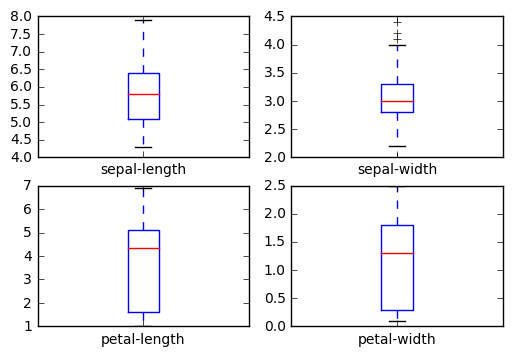

In [75]:
# box and whisker plots
bxplot = dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# bxplot[0].set_ylim(2,30)      # each subplot can be manipulated
plt.show()

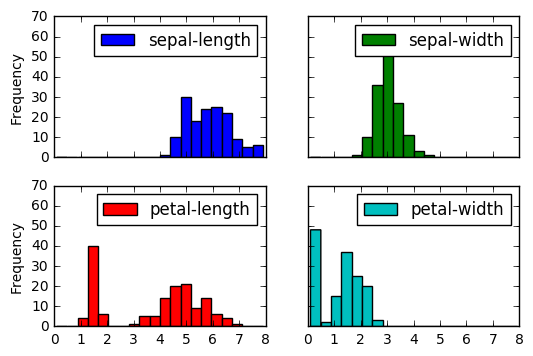

In [76]:
# hist plots
hstplot = dataset.plot(kind='hist', bins=20, subplots=True, layout=(2,2), sharex=True, sharey=True)
# hstplot[1,1].set_xlim(0,20)
plt.show()

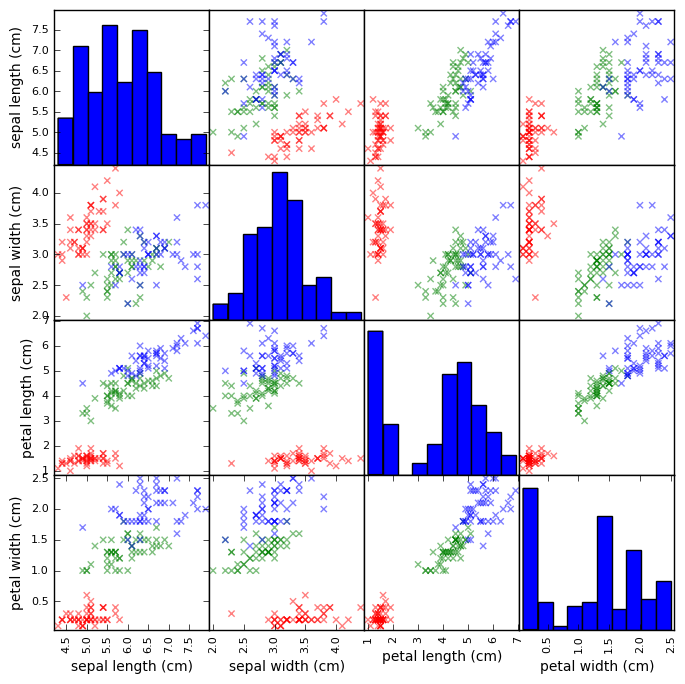

In [77]:
# This dataset assigns classes to numbers. Each class number is then assigned a color which is used to plot a scattering matrix.

from sklearn import datasets

iris = datasets.load_iris()
iris_data = pandas.DataFrame(data=iris['data'],columns=iris['feature_names'])
iris_data["target"] = iris['target']

color_wheel = {1: 'red', 
               2: 'green', 
               3: 'blue'}

colors = iris_data['target'].map(lambda x: color_wheel.get(x + 1))

axarr = scatter_matrix(iris_data.loc[:,iris['feature_names']], c=colors, diagonal='hist', marker='x', alpha=0.5, figsize=(8, 8))
# axarr[0,0].set_ylim(0,10); 
# axarr[0,0].get_yticks()
# axarr[0,0].get_yticklabels()
# axarr[0,0].yaxis.set_ticks([0,100,1])
## this can be used to modify a speicific subplot, however it could affect the scaling of the matrix
plt.show()

In [78]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [79]:
# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [80]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

In [81]:
# evaluate each model in turn
results = []
names = []
for (name, model) in models:
#     print(name)
#     print(model)
    # define how many folds of data to use in calculating the cross_val_score
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    # giving the cross_val_score of each data fold
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    # store all cross_val_score in the 'results' list
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


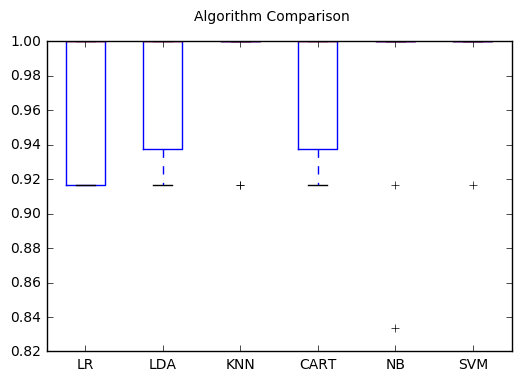

In [82]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [83]:
# Make predictions on validation dataset using knn fitting method
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)

### Precision vs Recall
Precision: the fraction of retrieved instances that are relevant

Recall: the fraction of relevant instances that are retrieved
##### Bottom line: precision is "how useful the predicted results are", and recall is "how complete the predicted results are"

In [84]:
# Compare the predictions with the actual Y_validations
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [85]:
# Simple example of using cross_val_score, 3-fold by default --> get 3 values
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
diabetes = datasets.load_diabetes()
X = diabetes.data[:150]
y = diabetes.target[:150]
lasso = linear_model.Lasso()
print(cross_val_score(lasso, X, y))  


[ 0.33150734  0.08022311  0.03531764]
